In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm



In [2]:
dftrain=pd.read_csv('C:/Users/student/Documents/Senior/Spring/Capstone/Nuveen/WF_Train_round1.csv')

In [3]:
dftest=pd.read_csv('C:/Users/student/Documents/Senior/Spring/Capstone/Nuveen/WF_Test_round1.csv', low_memory=False)

In [4]:

dftrain['nuveen_t3m_sales_muni_bonds'].max()

7920237.95

In [5]:
dftest['nuveen_t3m_sales_muni_bonds'].max()

7920237.95

In [6]:
dftrain.shape

(4824, 187)

In [7]:
dftrain.drop(dftrain.index[dftrain['nuveen_t3m_sales_muni_bonds'] >= 4000000], inplace=True)

In [8]:
dftrain.shape

(4821, 187)

In [9]:
dftest.shape

(4824, 187)

In [10]:
dftest.drop(dftest.index[dftest['nuveen_t3m_sales_muni_bonds'] >= 4000000], inplace=True)

In [11]:
dftest.shape

(4823, 187)

In [12]:

model = sm.logit(formula='muni ~ t12m_sales_us_equity+nuveen_t12m_sales_muni_bonds+nuveen_t24m_sales_hy_taxable+\
                 t12m_reds_int_equity+t12m_reds_muni_bonds+mf_aum_ig_taxable+mf_aum_muni_bonds+\
                 t24m_netsl_us_equity+asset2p+asset3p+young+old', data=dftrain).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.326864
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   muni   No. Observations:                 4821
Model:                          Logit   Df Residuals:                     4808
Method:                           MLE   Df Model:                           12
Date:                Wed, 05 Apr 2023   Pseudo R-squ.:                  0.2444
Time:                        19:49:20   Log-Likelihood:                -1575.8
converged:                       True   LL-Null:                       -2085.6
Covariance Type:            nonrobust   LLR p-value:                1.196e-210
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -2.9315      0.089    -33.049      0.000

In [13]:

Xtest = dftest[['t12m_sales_us_equity', 'nuveen_t12m_sales_muni_bonds', 'nuveen_t24m_sales_hy_taxable',\
                't12m_reds_int_equity', 't12m_reds_muni_bonds', 'mf_aum_ig_taxable', 'mf_aum_muni_bonds',\
                 't24m_netsl_us_equity', 'asset2p', 'asset3p', 'young', 'old']]
ytest = dftest['muni']
  
muni_yhat = model.predict(Xtest)


In [14]:
dftest['muni_yhat'] = muni_yhat

In [15]:
print(muni_yhat)

0       0.045812
1       0.059427
2       0.057869
3       0.058392
4       0.144870
          ...   
4819    0.050723
4820    0.274447
4821    0.070302
4822    0.298847
4823    0.051686
Length: 4823, dtype: float64


In [16]:

dftest = dftest.sort_values(by = 'muni_yhat', ascending = False)


In [17]:
dftest['Muni_Equity_Quintile'] = pd.qcut(dftest['muni_yhat'], 5, labels=[i for i in range (5, 0, -1)])

In [18]:
print(dftest['Muni_Equity_Quintile'])

1060    1
3511    1
2401    1
3148    1
2427    1
       ..
2419    5
3079    5
3886    5
4178    5
1023    5
Name: Muni_Equity_Quintile, Length: 4823, dtype: category
Categories (5, int64): [5 < 4 < 3 < 2 < 1]


In [19]:
dftest['Muni_Equity_Quintile'] = dftest['Muni_Equity_Quintile'].astype('int')

In [20]:
dftest['Muni_Equity_Quintile'].value_counts().reset_index(name='count')


,index,count
0,3,965
1,5,965
2,1,965
3,2,964
4,4,964


In [21]:

buyers = pd.crosstab(dftest['Muni_Equity_Quintile'], dftest['muni'], normalize='index')



In [22]:
print(buyers)

muni                         0         1
Muni_Equity_Quintile                    
1                     0.503627  0.496373
2                     0.831950  0.168050
3                     0.946114  0.053886
4                     0.973029  0.026971
5                     0.986528  0.013472


In [23]:
 dftest.groupby('Muni_Equity_Quintile')['nuveen_t3m_sales_muni_bonds'].mean()

Muni_Equity_Quintile
1    80864.749554
2    15654.994378
3     1431.291565
4     1436.191660
5     1838.519358
Name: nuveen_t3m_sales_muni_bonds, dtype: float64

<AxesSubplot:title={'center':'Proportion of Advisors Buying 2+ Asset Classes and Buying Muni Bond Funds'}, xlabel='Muni_Equity_Quintile'>

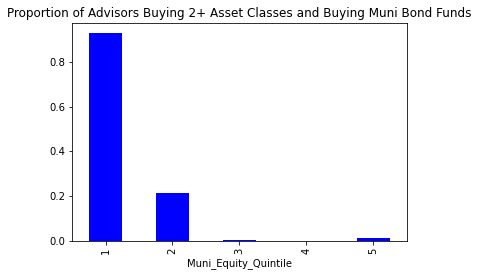

In [24]:
dftest.groupby(by = "Muni_Equity_Quintile")['asset2p'].mean().plot(kind = "bar", title="Proportion of Advisors Buying 2+ Asset Classes and Buying Muni Bond Funds", color='blue')


<AxesSubplot:title={'center':'Sales of Muni Bond Fund Sales to advisors 45+ by Quintile'}, xlabel='Muni_Equity_Quintile'>

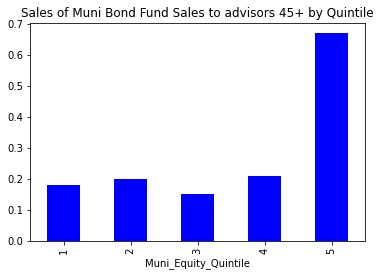

In [25]:
dftest.groupby(by = "Muni_Equity_Quintile")['old'].mean().plot(kind = "bar", title="Sales of Muni Bond Fund Sales to advisors 45+ by Quintile", color='blue')


In [70]:
dftest.to_csv('C:/Users/tdougherty1/Desktop/AA490 Spring23/Wells Fargo/WFTest.csv')